In [1]:
library(glue)
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(tidyverse)
library(fitdistrplus)

# read data
DATA_URL <- "https://raw.githubusercontent.com/aarora79/biomettracker/master/data/Amit.csv"
bodyweight <- read_csv(DATA_URL) %>%
  janitor::clean_names()
head(bodyweight)


Attaching package: ‘dplyr’


The following object is masked from ‘package:glue’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.0.6     ✔ purrr   0.3.4
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.0.6     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::collapse()        masks glue::collapse()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base:

date,weight,bmi,body_fat,lean_mass,muscle_percentage,water_percentage
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-17,192.90,29.2,27.8,139.28,38.9,52.7
2021-03-16,193.34,29.3,27.9,139.40,38.8,52.6
2021-03-15,195.99,29.7,28.4,140.33,38.7,52.3
2021-03-14,194.67,29.5,28.1,139.97,38.8,52.5
2021-03-13,193.60,29.5,28.1,139.97,38.8,52.5
2021-03-12,194.89,29.5,28.2,139.93,38.7,52.4


weight,n
<int>,<int>
198,11
199,20
200,15
201,28
202,25
203,22
204,17
205,10
206,9


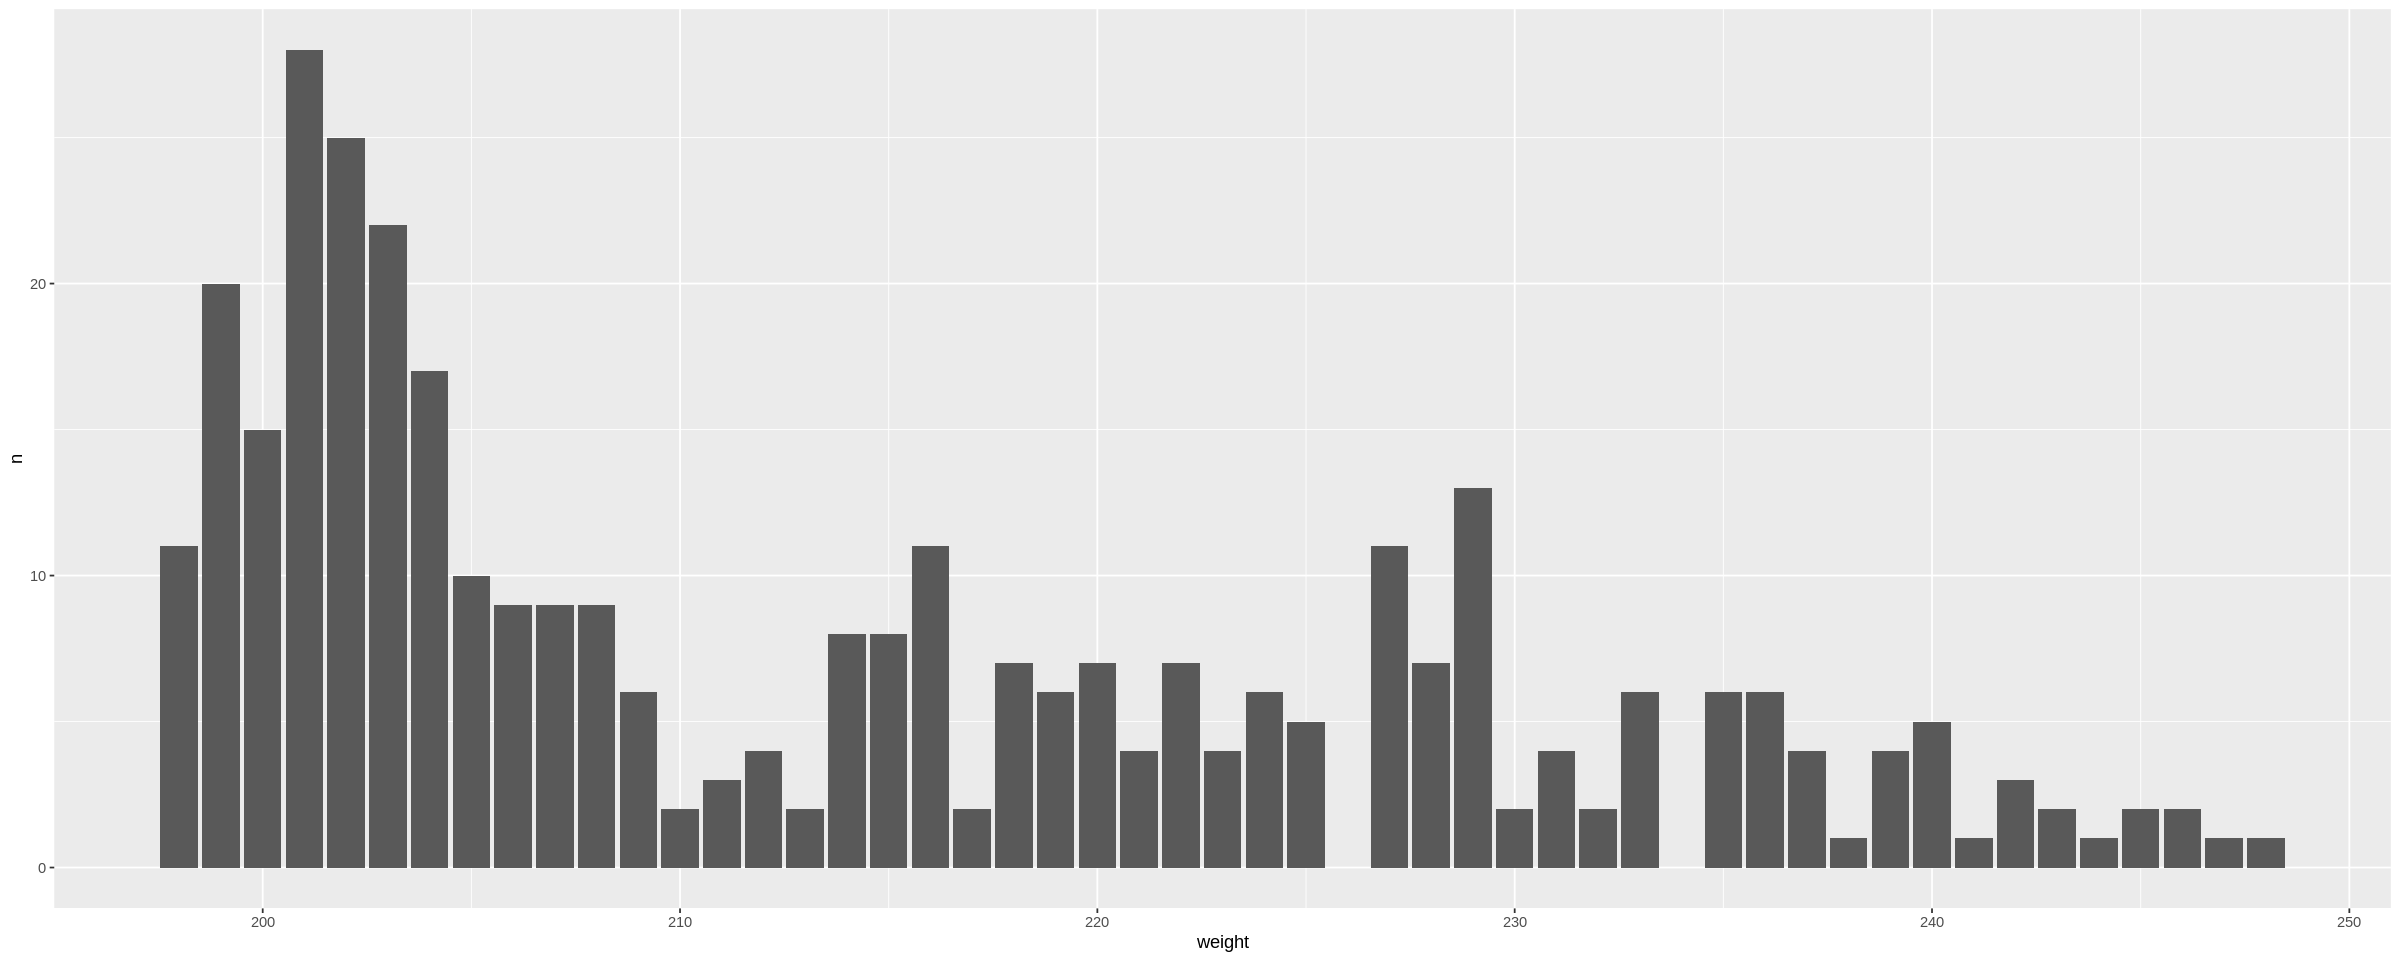

In [2]:
# filter out weights between min weight and min weight + 5, basically we are trying
# to only include weights which we know have been passed reliably i.e. no more fluctuations
days_at_weight <- bodyweight %>%
  mutate(weight = as.integer(weight)) %>%
  filter(weight >= min(bodyweight$weight)+5 & weight <= max(bodyweight$weight)-5) %>%
  count(weight) %>%
  arrange(weight)

head(days_at_weight, 10)

options(repr.plot.width=20, repr.plot.height=8)
days_at_weight %>%
  ggplot(aes(x=weight, y=n)) +
  geom_bar(stat='identity')

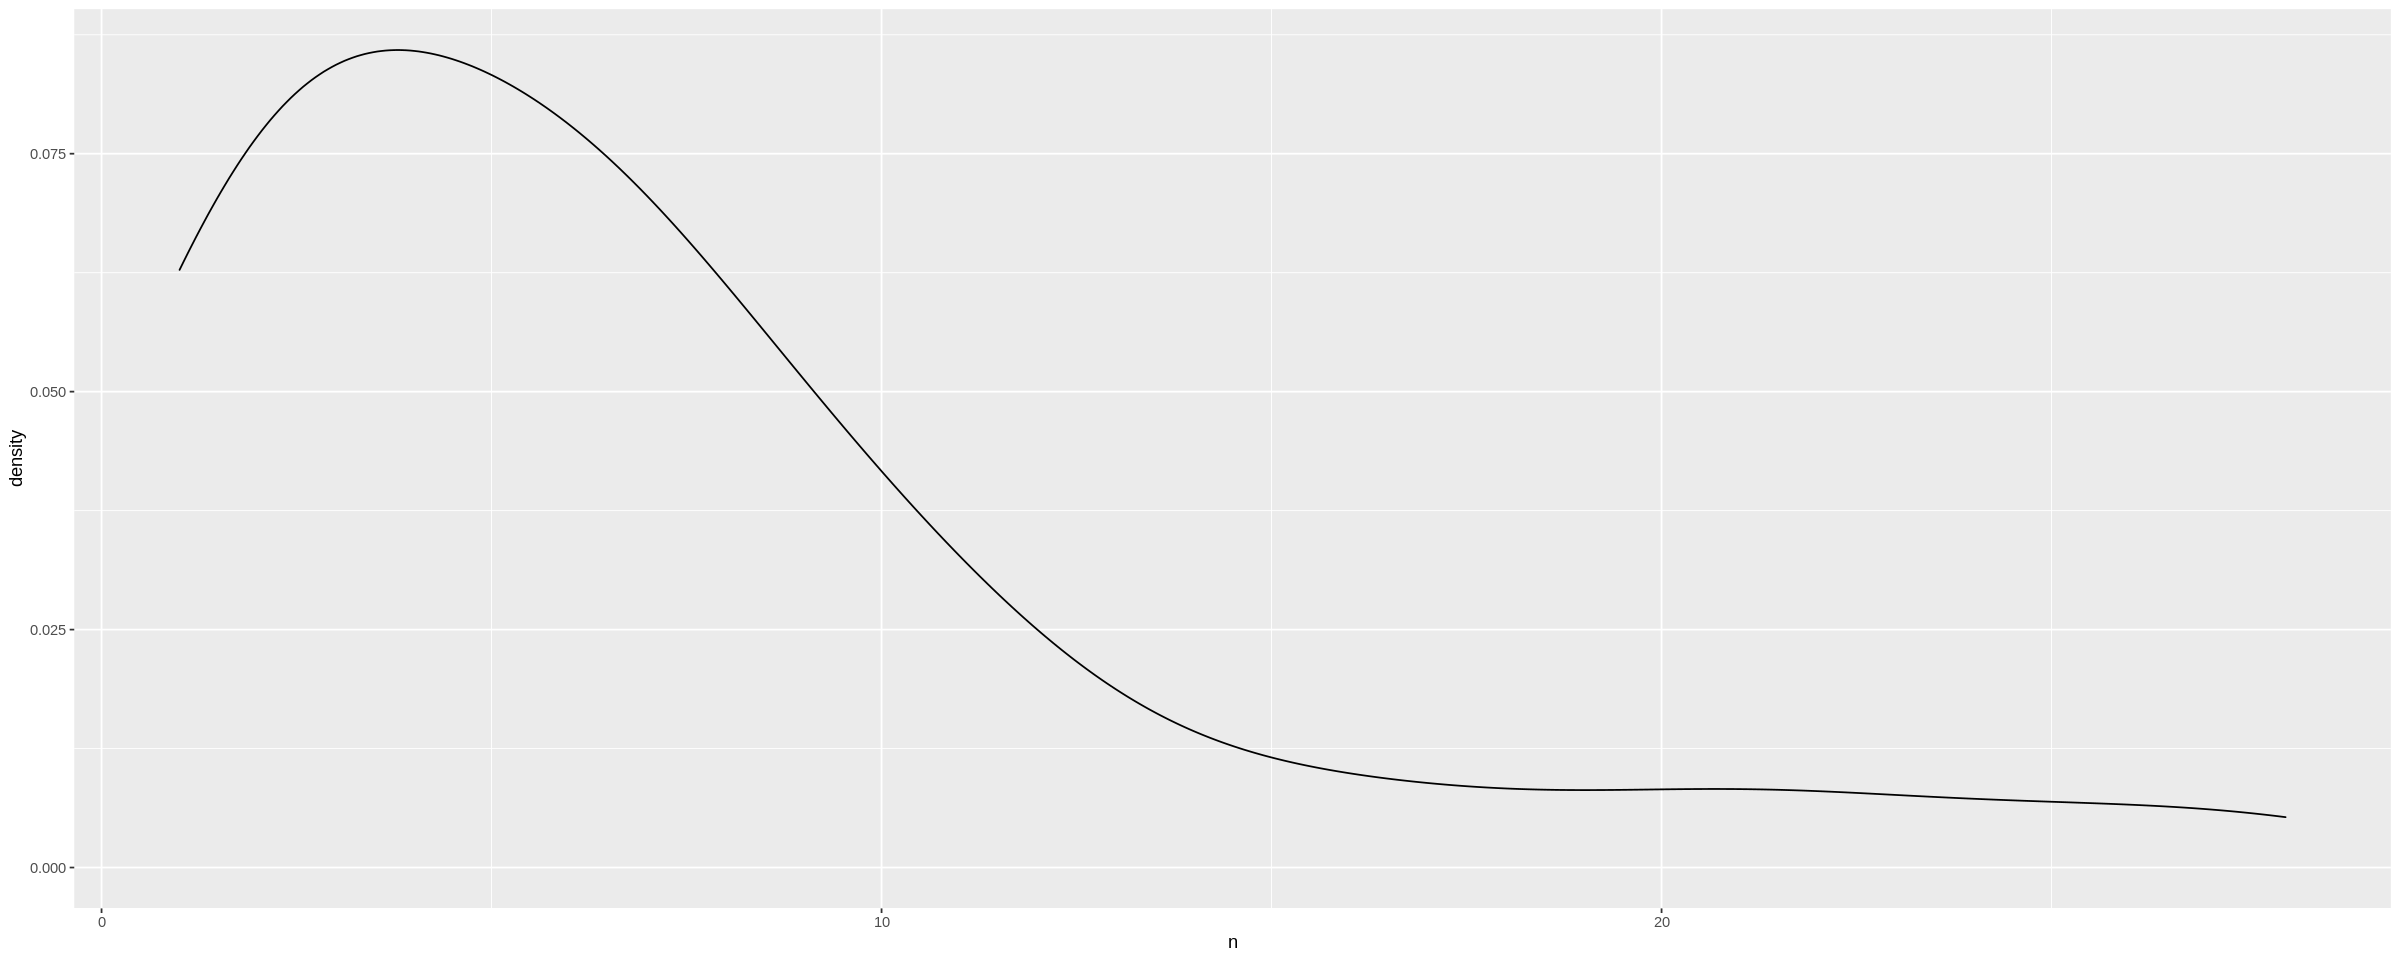

In [3]:
# plot the number of days as a distribution
days_at_weight %>%
  ggplot(aes(x=n)) +
  geom_density()

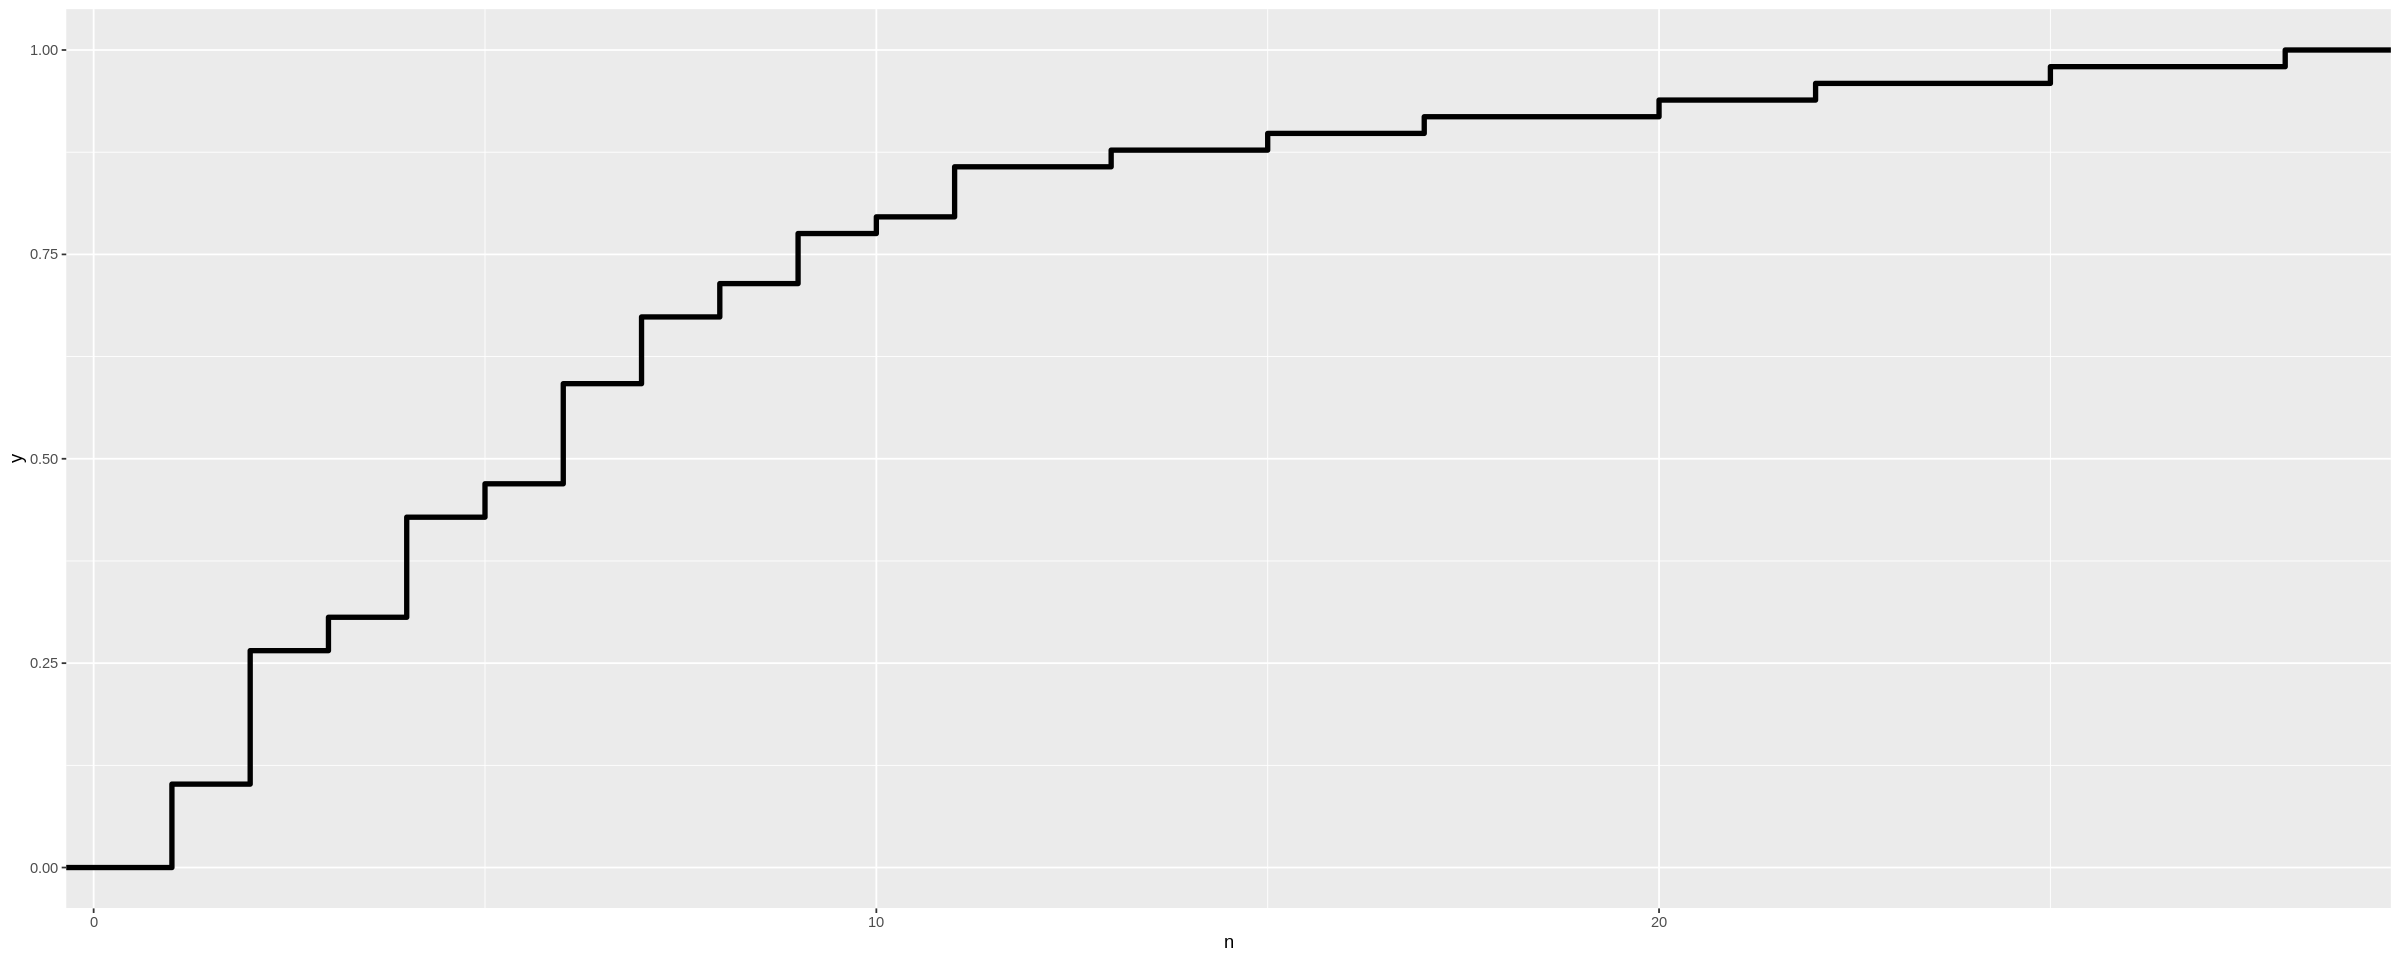

In [4]:
days_at_weight %>%
  ggplot(aes(x = n)) +
  stat_ecdf(geom = "step", size = 1.5) 

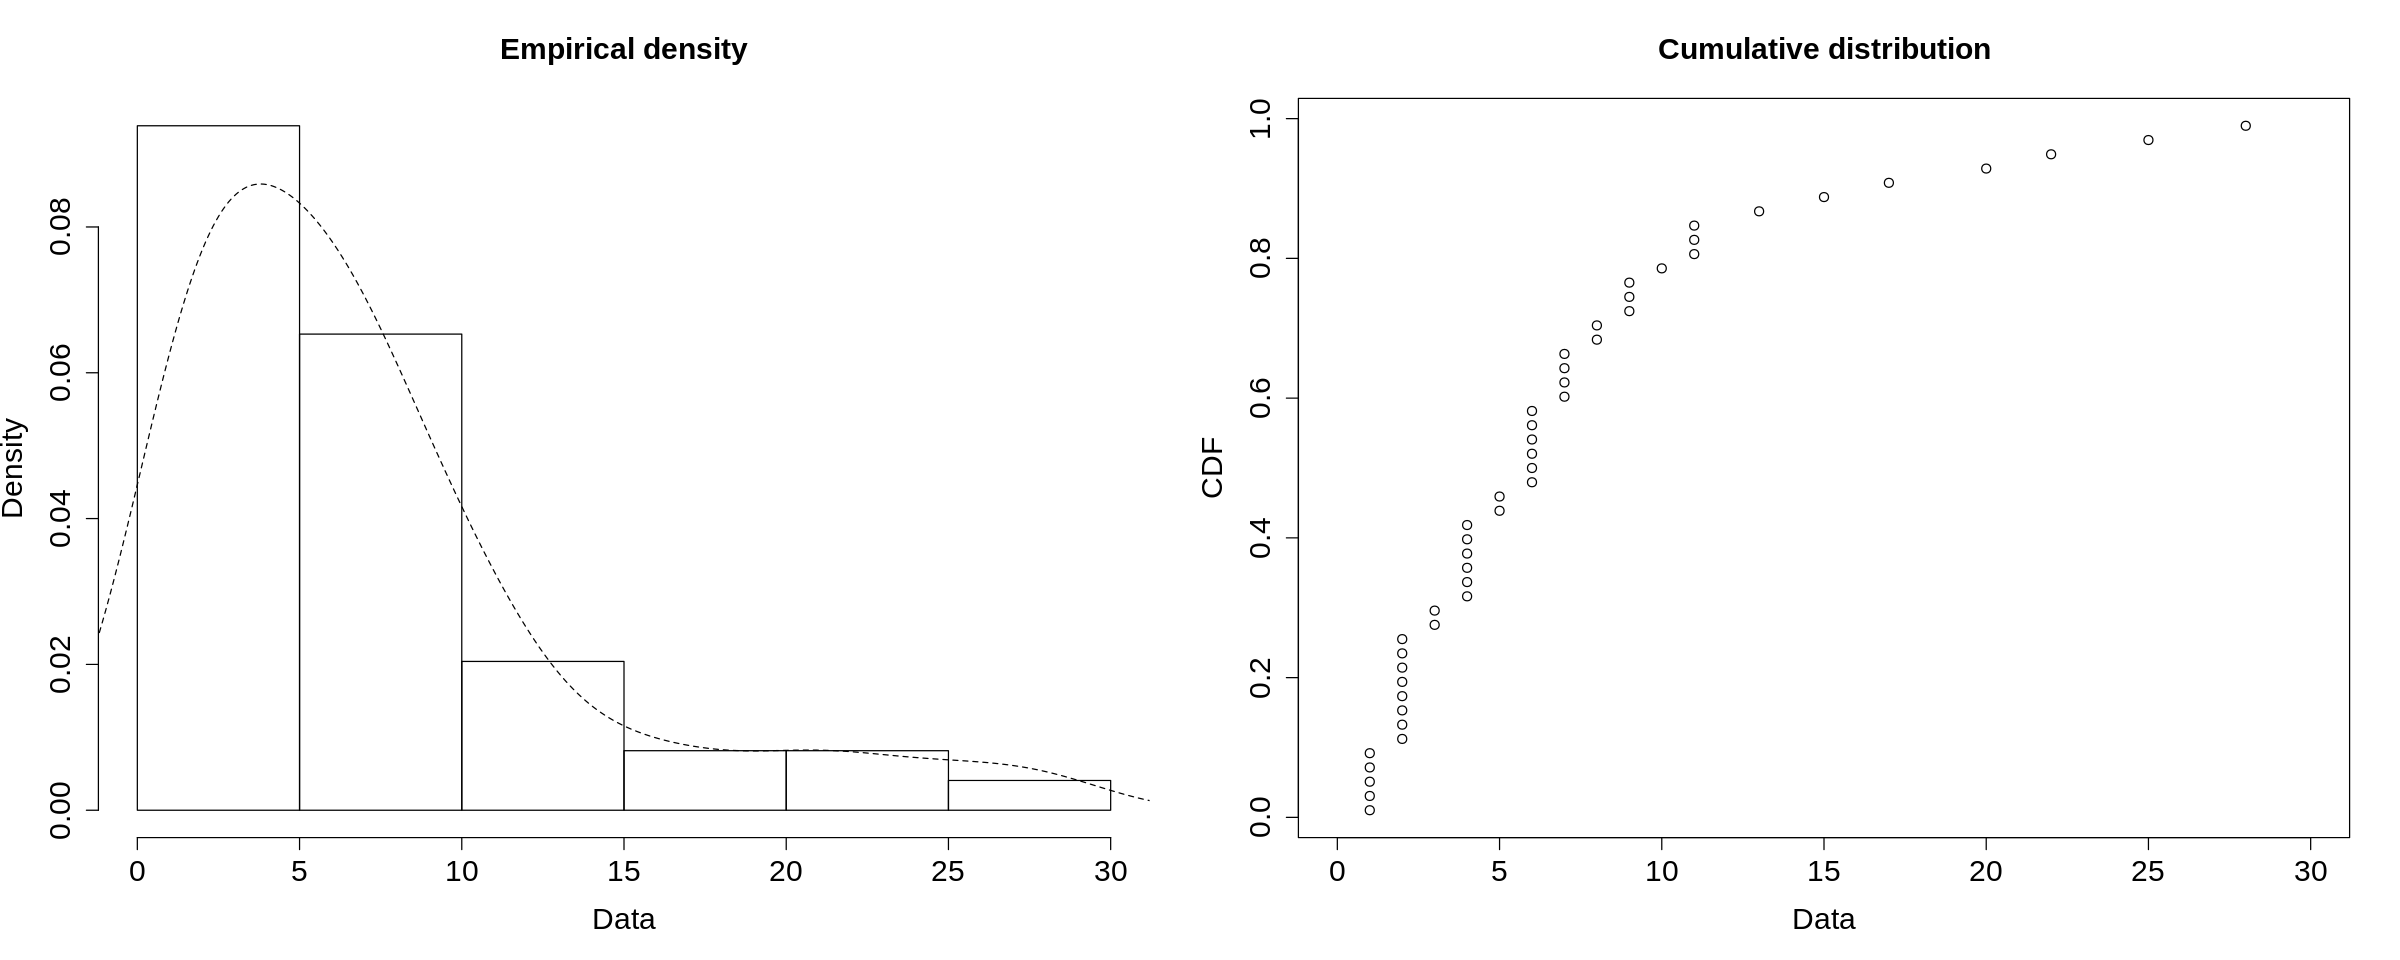

In [19]:
# plot the empiricial density and CDF using built-in plotdist function from fitdistrplus package
options(repr.plot.width=20, repr.plot.height=8)

par(mfrow = c(1, 2), cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

plotdist(days_at_weight$n, histo = TRUE, demp = TRUE)

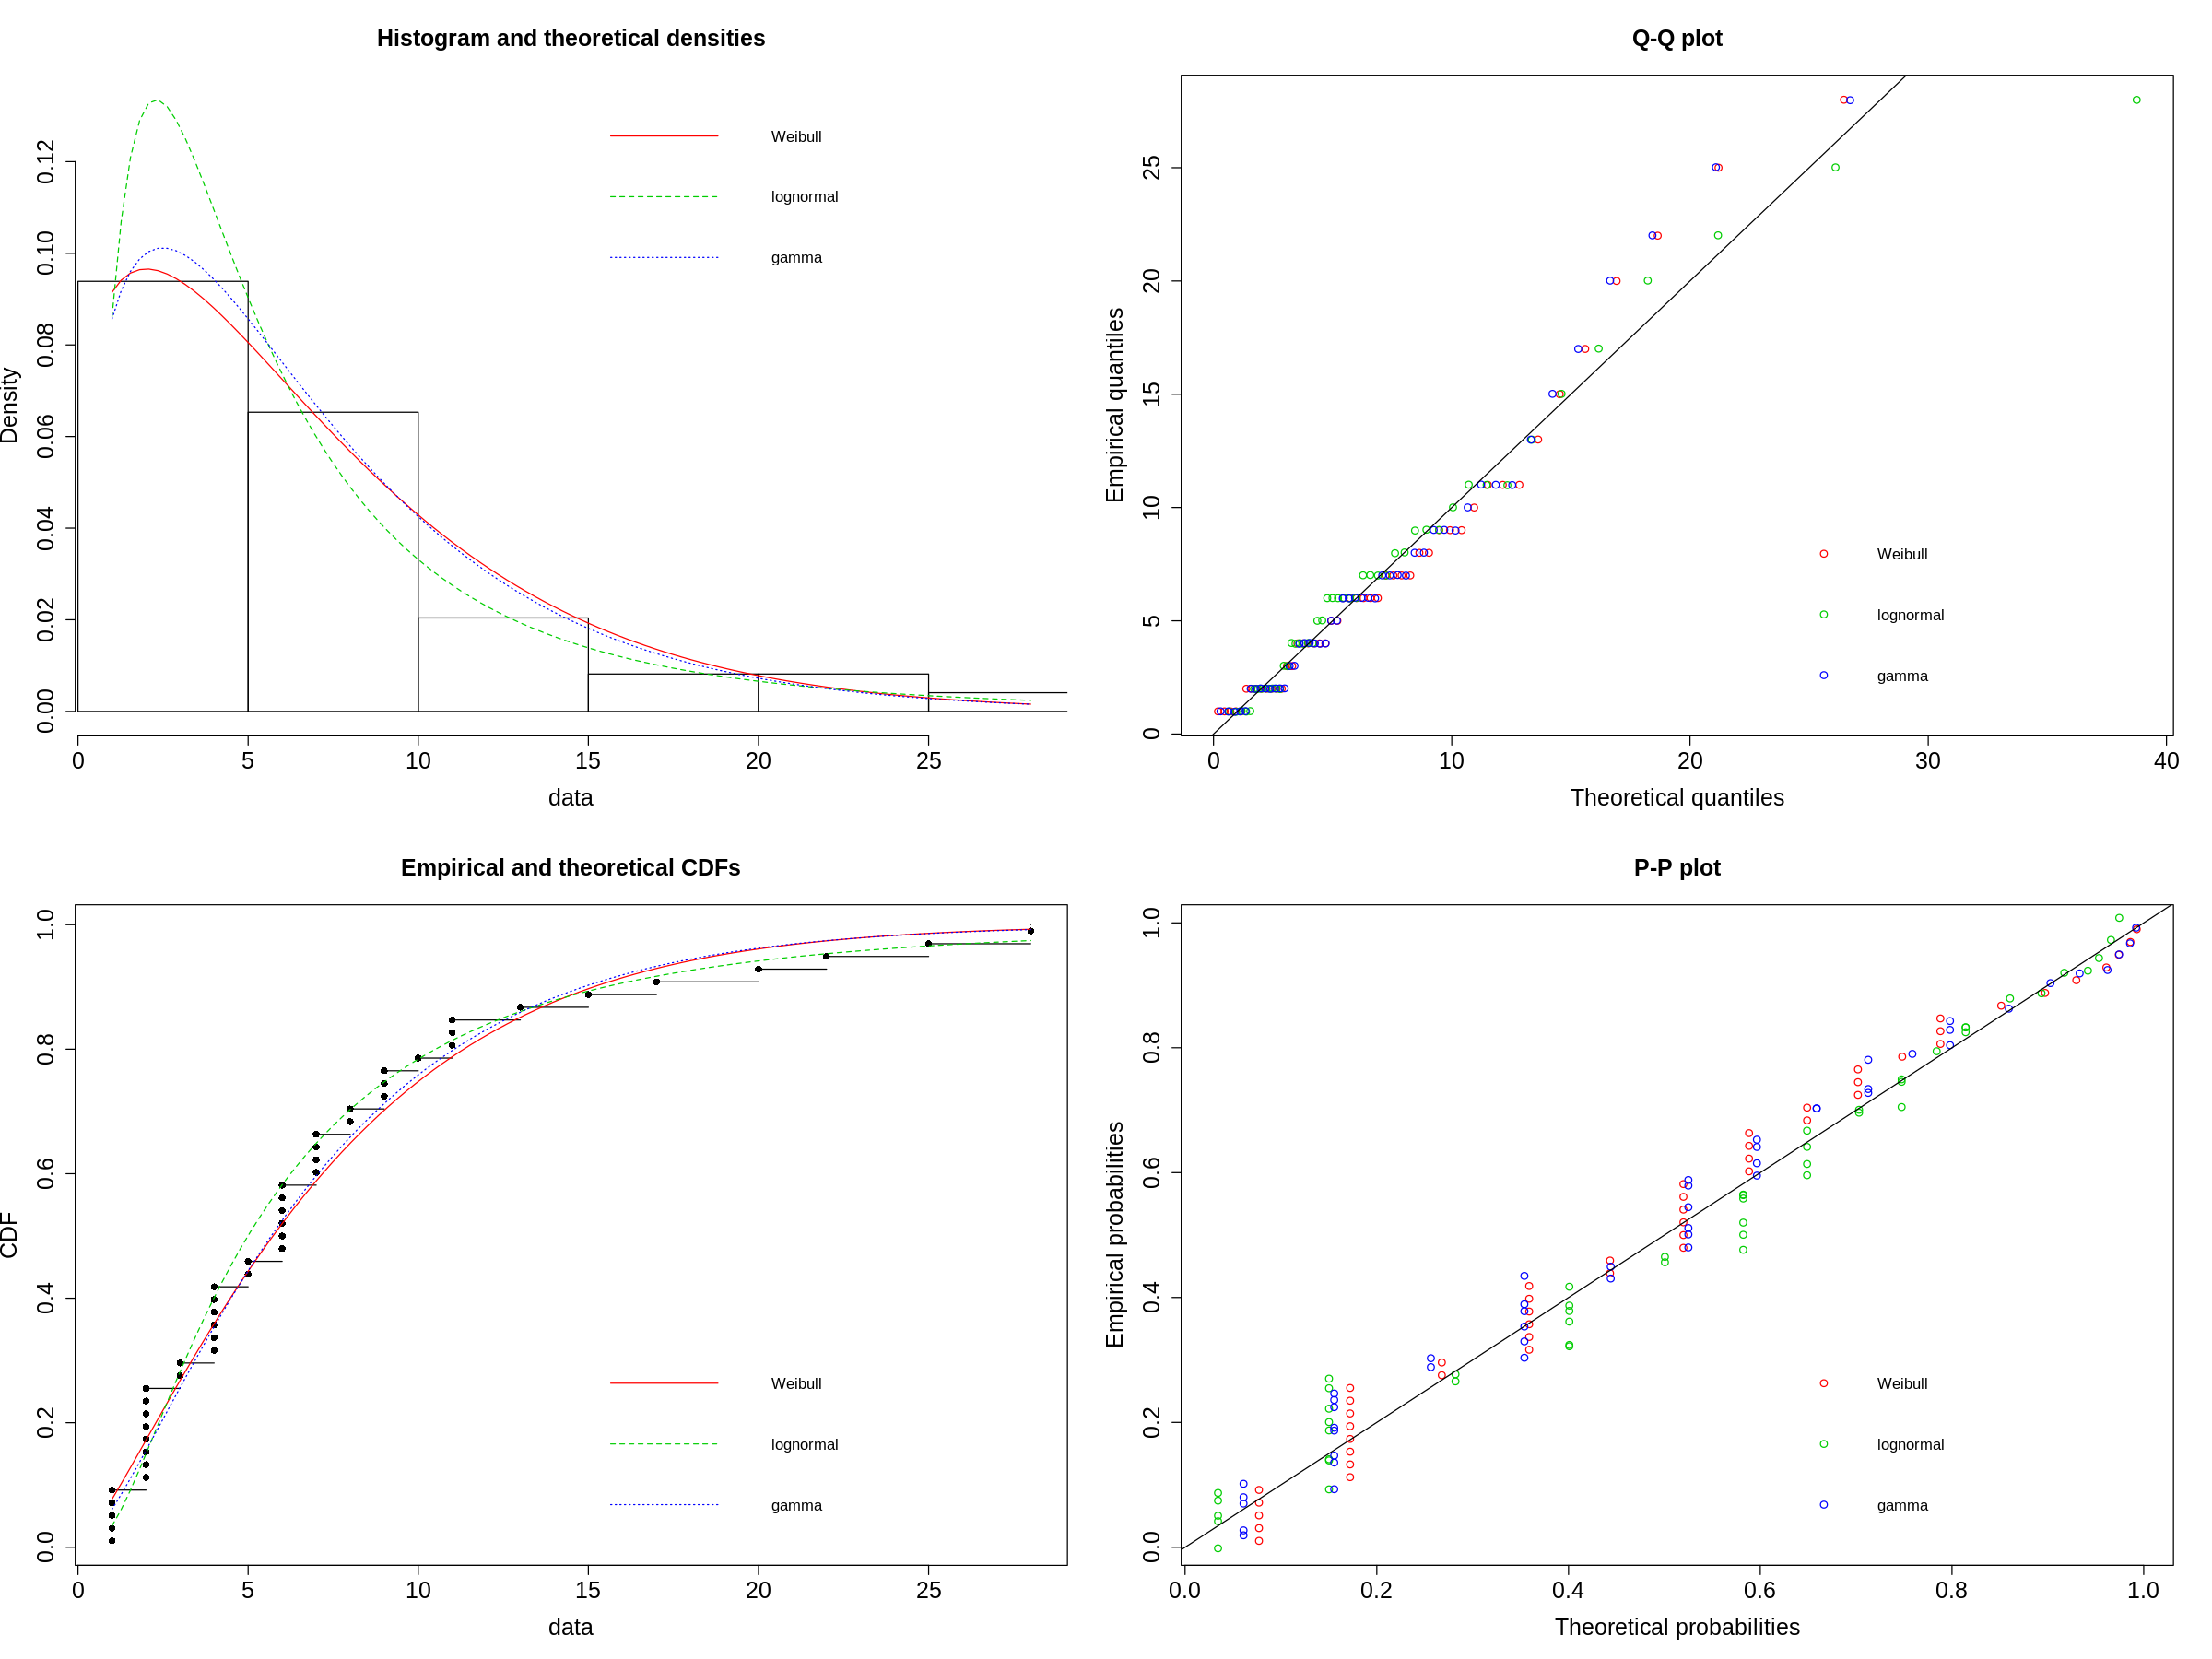

In [23]:
options(repr.plot.width=20, repr.plot.height=15)
# the distribution is somewhat long tailed so lets try fitting weibull, gamma and log normal distrubtions
fw <- fitdist(days_at_weight$n, "weibull")
fg <- fitdist(days_at_weight$n, "gamma")
fln <- fitdist(days_at_weight$n, "lnorm")
par(mfrow = c(2, 2), cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot.legend <- c("Weibull", "lognormal", "gamma")

denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)